In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing The Dataset**

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing The Dependencies**

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_437.jpg', 'with_mask_368.jpg', 'with_mask_2139.jpg', 'with_mask_2605.jpg', 'with_mask_541.jpg']
['with_mask_3415.jpg', 'with_mask_786.jpg', 'with_mask_1849.jpg', 'with_mask_1342.jpg', 'with_mask_1920.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_763.jpg', 'without_mask_2504.jpg', 'without_mask_2463.jpg', 'without_mask_1123.jpg', 'without_mask_793.jpg']
['without_mask_1247.jpg', 'without_mask_3368.jpg', 'without_mask_750.jpg', 'without_mask_1231.jpg', 'without_mask_2005.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels For Two Classes Of Iamges**

In [9]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


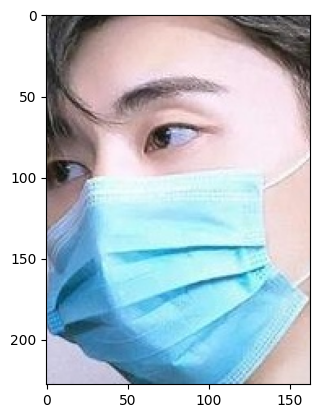

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

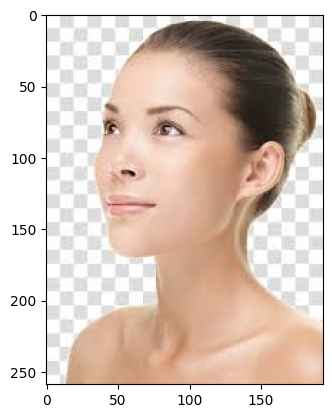

In [14]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**



1.   Resizing the images.
2.   Convert the images to numpy arrays.



In [15]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

In [18]:
data[0]

array([[[ 36,  32,  20],
        [ 22,  19,   8],
        [ 18,  15,   8],
        ...,
        [ 13,  12,   8],
        [ 12,  11,   7],
        [ 11,  10,   6]],

       [[ 30,  26,  15],
        [ 20,  16,   7],
        [ 18,  15,   9],
        ...,
        [ 11,  11,   7],
        [ 11,  12,   7],
        [ 10,  11,   6]],

       [[ 23,  19,  11],
        [ 18,  14,   6],
        [ 16,  13,   8],
        ...,
        [ 10,  11,   6],
        [ 10,  11,   6],
        [ 11,  12,   7]],

       ...,

       [[122,  84,  45],
        [121,  86,  46],
        [118,  83,  45],
        ...,
        [164, 187, 141],
        [159, 182, 136],
        [157, 180, 134]],

       [[122,  84,  45],
        [121,  86,  46],
        [116,  82,  45],
        ...,
        [163, 186, 140],
        [160, 183, 137],
        [160, 183, 137]],

       [[123,  86,  47],
        [120,  85,  47],
        [113,  79,  42],
        ...,
        [164, 186, 140],
        [163, 185, 139],
        [160, 183, 137]]

In [19]:
data[0].shape

(128, 128, 3)

In [20]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [21]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [22]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [25]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [26]:
X_train[0]

array([[[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       ...,

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]]

In [27]:
X_train_scaled[0]

array([[[0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275],
        ...,
        [0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275]],

       [[0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275],
        ...,
        [0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275]],

       [[0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275],
        ...,
        [0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275]],

       ...,

       [[0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0

**Building A CNN**

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [30]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [31]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 9s 25ms/step - loss: 0.4780 - acc: 0.7903 - val_loss: 0.3051 - val_acc: 0.8545
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2919 - acc: 0.8871 - val_loss: 0.2556 - val_acc: 0.8876
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2301 - acc: 0.9099 - val_loss: 0.2148 - val_acc: 0.9058
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1883 - acc: 0.9270 - val_loss: 0.2051 - val_acc: 0.9240
Epoch 5/5
170/170 [==============================] - 3s 20ms/step - loss: 0.1471 - acc: 0.9456 - val_loss: 0.2322 - val_acc: 0.9074


In [32]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2244 - acc: 0.9206
Test Accuracy = 0.9205824136734009


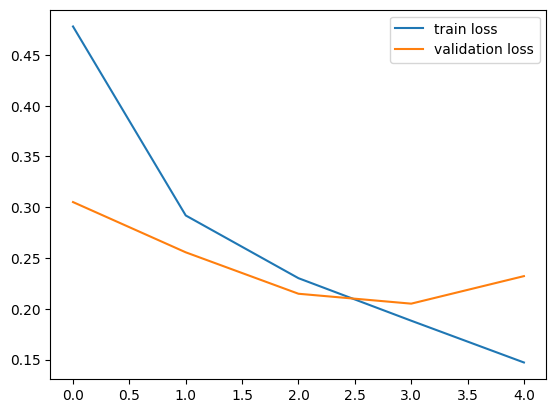

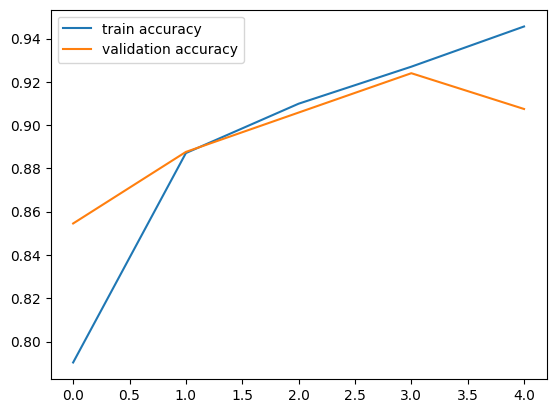

In [33]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_1003.jpg


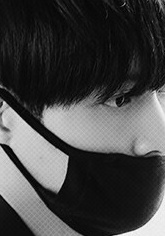

1/1 [==============================] - 0s 18ms/step
[[0.00103192 0.99412775]]
1
The person in the image is wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/with_mask/with_mask_1203.jpg


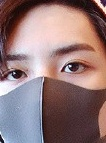

1/1 [==============================] - 0s 18ms/step
[[0.45706603 0.5129263 ]]
1
The person in the image is wearing a mask


In [50]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')